In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#figure 내 구획 나누기 
import matplotlib.gridspec as gridspec

#다각형(도형) 그리기
from matplotlib.patches import Polygon

#한글 사용시 깨짐현상 발생 해결.
from matplotlib import font_manager as fm
from matplotlib import rc
fm.get_fontconfig_fonts()
font_path='C:/Windows/Fonts/a아시아헤드2.ttf'
font = fm.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [2]:
path = './precip.mon.ltm.nc'
ncfile = xr.open_dataset(path)
print(ncfile)

<xarray.Dataset>
Dimensions:             (lat: 72, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon                 (lon) float32 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:                    CF-1.0
    curator:                        Dr. Jian-Jian Wang\nESSIC, University of ...
    description:                    http://eagle1.umd.edu/GPCP_ICDR/GPCPmonth...
    citation:                       Adler, R.F., G.J. Huffman, A. Chang, R. F...
    title:                          GPCP Version 2.3 Combined Precipitation D...
    platform:                       NOAA POES (Polar Orbitin

C:\Users\admin\anaconda3\lib\site-packages\xarray\coding\times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\admin\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Data Processing

In [3]:
#select variables
precip = ncfile.data_vars['precip']
print(precip)
print(precip.shape)

<xarray.DataArray 'precip' (time: 12, lat: 72, lon: 144)>
[124416 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [5.6044193e-04 3.0161072e+01]
(12, 72, 144)


In [4]:
np.sum(np.isnan(precip))

<xarray.DataArray 'precip' ()>
array(0)

In [5]:
#print time info.
print(precip.time)

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(1, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 2, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 3, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 4, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 5, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 6, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 7, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 8, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 9, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 10, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 11, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 12, 1, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object

In [6]:
#Select USA domain
precip_usa = precip.sel(lon=slice(225, 295),lat=slice(20,60))
# pick slightly larger for visualization
print(precip_usa.shape) #(time, lon, lat)=(12,16,28) | 튜플타입.

#calcualte RMS (Root Mean Square) std
rms=precip_usa.std(dim = 'time')
#std example : https://url.kr/rn6mvo
#각 lat, lon의 전체 기간에 대한 std을 구하는 건가?
#시간 dimension이 사라짐.

print(rms)
print(rms.shape) #(lat, lon) = (16, 28) 

(12, 16, 28)
<xarray.DataArray 'precip' (lat: 16, lon: 28)>
array([[0.2926685 , 0.30302483, 0.33101517, 0.36275277, 0.39701474,
        0.3811006 , 0.403455  , 0.421538  , 0.5446736 , 0.60877424,
        0.9765126 , 4.0433373 , 2.7548249 , 1.5738686 , 2.1024    ,
        2.3103225 , 1.1026267 , 1.6192552 , 1.7161454 , 1.3678104 ,
        1.6076367 , 1.7627763 , 1.9942648 , 1.3864498 , 0.8347253 ,
        0.44742557, 0.5794701 , 0.6283862 ],
       [0.29126355, 0.29022384, 0.2870776 , 0.256075  , 0.27283758,
        0.25529453, 0.2668365 , 0.255155  , 0.22184025, 0.6496381 ,
        1.5174145 , 2.8076403 , 1.4668144 , 0.7441839 , 1.4425963 ,
        0.9637321 , 0.95894164, 0.8882452 , 0.6722494 , 0.77948326,
        1.1779016 , 1.8179744 , 1.3445715 , 0.7479757 , 0.7287004 ,
        0.7465663 , 0.78380877, 0.69964176],
       [0.3314236 , 0.28884974, 0.2507817 , 0.21574497, 0.19858164,
        0.19144058, 0.16471124, 0.15084347, 0.18605311, 0.5890763 ,
        2.024166  , 1.9522709 , 0.

In [7]:
#Area average (선택한 특정 지역 precip.의 area average)
region1 = precip.sel(lon=slice(232,238), lat = slice(45,51)).mean(dim=['lon','lat'])
region2 = precip.sel(lon=slice(262,267), lat = slice(38,44)).mean(dim=['lon','lat'])
print(region1) #[time] 설정한 lon, lat에 대해 aave함. time dimension만 남음. 
print(region2) #[time]

<xarray.DataArray 'precip' (time: 12)>
array([10.074272 ,  7.528137 ,  6.6028857,  4.852235 ,  3.0713537,
        2.44179  ,  1.3479197,  1.6779404,  2.8065453,  6.978965 ,
       10.529076 ,  9.918045 ], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
<xarray.DataArray 'precip' (time: 12)>
array([1.1058679, 1.3891217, 2.2461433, 3.198786 , 4.105555 , 4.597954 ,
       3.7256594, 3.4584997, 3.2561104, 2.4102938, 1.9538555, 1.4483463],
      dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00


# Visualization

In [8]:
#customized function for bounding box
def draw_box(ax, m, lon1, lon2, lat1, lat2, idx):
    x1, y1 = m(lon1, lat1)
    x2, y2 = m(lon1, lat2)
    x3, y3 = m(lon2, lat2) #(x3, y3)랑 (x4, y4) 순서바뀌면 나비모양됨. 
    x4, y4 = m(lon2, lat1) # 입력한 좌표로 한붓그리기가 될 수 있도록 좌표를 설정해주어야함. 
    poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='none', edgecolor='k',linewidth=2)
    ax.add_patch(poly) #ax라는 axes안에 poly라는 도형을 추가해라.
    #figure는 여러개의 그림으로 이루어진 그림 전체. 
    #axes는 하나의 figure을 이루는 각각의 그림 (subplot) 을 말함. 
    
    ax.annotate(text=idx, xy=m((lon1+lon2)/2, (lat1+lat2)/2),fontsize=15, fontweight='bold',
                horizontalalignment='center',verticalalignment='center')
    #ax에 그려진 poly 안에 idx의 인자로 받은 문자열을 annotate 함. 
    #xy = the point (x, y) to annotate. The coordinate system is determined by xycoords.

Text(0.5, 0, 'month')

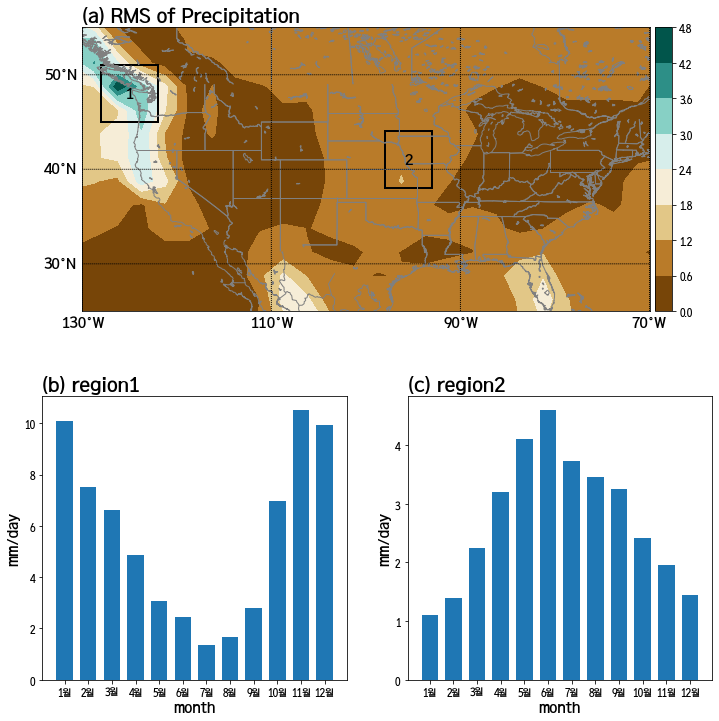

In [9]:
fig=plt.figure(figsize=(12,12))
#그림의 크기는 plt.figure() 함수를 통해서 조절할 수 있다. 
#plt.figure()는 figure의 속성을 변경하는데 사용되는 함수이다. 
#크기를 변경하려면 plt.figure(figsize=(15, 5)) 와 같이 가로/세로 크기를 준다. 
#이 때 단위는 ‘인치’이다. 
#dpi= 옵션을 추가로 사용해서 픽셀 크기를 조정할 수 있다.

#define gridspec
spec = gridspec.GridSpec(ncols=2, nrows=2)
#gridspec : A grid layout to place subplots within a figure.
#more info. https://url.kr/mp56cf
#more info. https://noanswercode.tistory.com/46
#more info. https://data-newbie.tistory.com/447
#전체 figure구획을 2x2로 나눔. gridspec을 사용한 이유는 뒤에서 설명.

plt.subplots_adjust(wspace=0.2, hspace=0.3)
#subplots_adjust(left, bottom, right, top, wspace, hspace)
#현재 배치되어 있는 subplot들의 위치를 직접 조정한다.
#left, bottom, right, top 서브플롯 4면의 위치 조정
#hspace, wspace 서브플롯 간의 간격을 각각 figure의 너비와 높이에 대한 비율 조절

#draw specific grid
#(0,0)(0,1)
#(1,0)(1,1)

top_ax = fig.add_subplot(spec[0,:])
#top_ax는 2x2로 나뉜 figure의 0번째 행((0,0)과(0,1))을 병합한 영역 -> spec[0, :]
#여기서 gridspec을 쓴 이유는 (0,0)과 (0,1) 영역을 병합했기 때문이다.
#gridspec을 쓰지 않으면 
#(0,0) -> fig.add_subplots(2,2,0)
#(0,1) -> fig.add_subplots(2,2,1) 로 따로따로 가리켜야하며, 두 영역을 병합할 수 없다.
# 반면 gridspec을 쓰면 두 영역을 병합해서 쓸 수 있다. 

bottom_left_ax = fig.add_subplot(spec[1,0])
#bottom_left_ax는 figure의 (1,0) 영역 -> spec[1,0]
#gridspec이 없다면 fig.add_subplot(2,2,3)

bottom_right_ax=fig.add_subplot(spec[1,1])
#bottom_right_ax는 figure의 (1,1)영역 -> spec[1,1]
#gridspec이 없다면 fig.add_subplot(2,2,4)

m = Basemap(
    lon_0=0, lat_0=0,
    llcrnrlon=230, llcrnrlat=25, urcrnrlon=290, urcrnrlat=55,
    resolution = 'i', ax=top_ax)
# Basemap 인스턴스 생성시 입력가능한 arugments 는 밑 url들 참조. 
#https://matplotlib.org/basemap/api/basemap_api.html
# https://basemaptutorial.readthedocs.io/en/latest/basemap.html
# Basemap 사용 예시 : https://pinkwink.kr/1199


coord = np.meshgrid(rms.lon, rms.lat)

m.drawcoastlines(linewidth=1, color='gray') #draw coastlines
m.drawcounties(linewidth=1, color='gray') #Draw county boundaries in US
m.drawstates(linewidth=1, color='gray') #Draw state boundaries in Americas.


m.drawparallels(np.linspace(30,50,3), labels=[1,0,0,0], fontsize=15)
#가로선 (위도와 평행한 선)
#Draw and labels parallels (latitude lines) for values (in degrees)
#Given in the sequence circles. 
#Labels : list of 4 values (default [0,0,0,0])
#[left, right, top, bottom] 
#ex) [1, 0, 0, 0] : labelled on the left of the plot
#ex) [1, 0, 0, 1] : lablled where they intersect the left and bottom of the plot.

m.drawmeridians(np.linspace(230,290,4), labels=[0,0,0,1], fontsize=15)
#세로선, 경도와 평행한 선.
#이하 옵션은 drawparllels와 동일

plot1 = m.contourf(coord[0],coord[1],rms, cmap=plt.cm.BrBG)
draw_box(top_ax, m, 232,238,45,51, '1') #draw_box 함수 참조. 
draw_box(top_ax, m, 262,267,38,44, '2') #draw_box 함수 참조. 

cbar=m.colorbar(plot1, ax=top_ax, location='right', pad='1%', size='3%')
# Location sets the border of the map where the color scale is drawn. 
# Can be top, right, left or bottom
# Size sets the width of the color bar, in % of the parent axis
# Pad sets the separation between the axes and the color bar, in % of the parent axis
#more info. https://basemaptutorial.readthedocs.io/en/latest/utilities.html

cbar.ax.tick_params(labelsize=10)

top_ax.set_title('(a) RMS of Precipitation',loc='left', fontsize=20)

#month = [str(x) for x in range(1,13)]
month = [str(x)+"월" for x in range(1,13)]

bottom_left_ax.bar(month, region1, width=0.7)
bottom_left_ax.set_title('(b) region1', loc='left', fontsize=20)
bottom_left_ax.set_ylabel('mm/day', fontsize=15)
bottom_left_ax.set_xlabel('month', fontsize=15)
#bottom_left_ax.tick_params(labelsize=15)

bottom_right_ax.bar(month, region2, width=0.7)
bottom_right_ax.set_title('(c) region2', loc='left', fontsize=20)
bottom_right_ax.set_ylabel('mm/day', fontsize=15)
bottom_right_ax.set_xlabel('month', fontsize=15)
#bottom_left_ax.tick_params(labelsize=15)